# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 4: Symulowane wyżarzanie
## Przemysław Roman

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

def print_exec_time(t):
    print(f'Czas wykonania: {t}[s]')

## Zadanie 1 TSP

Wygeneruj chmurę n losowych punktów w 2D, a następnie zastosuj algorytm symulowa-
nego wyżarzania do przybliżonego rozwiązania problemu komiwojażera dla tych punk-
tów.
1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3
różnych układów punktów w 2D (rozkład jednostajny, rozkład normalny z czterema
różnymi grupami parametrów, dziewięć odseparowanych grup punktów).
2. Zbadaj wpływ sposobu generacji sąsiedniego stanu (consecutive swap vs. arbitrary
swap) oraz funkcji zmiany temperatury na zbieżność procesu optymalizacji.
3. Przedstaw wizualizację (saoptimset) działania procedury minimalizującej funkcję
celu.

### 1. Wizualizacje rozwiązań dla różnych parametrów
Przyjmuję poniższą funkcję temperatury jako domyślną

In [1]:
from SimulatedAnnealingTSP import SimulatedAnnealingTSP
from PointsGeneratorTSP import PointsGeneratorTSP

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.995

a) Rozkład jednostajny, mała liczba wierzchołków

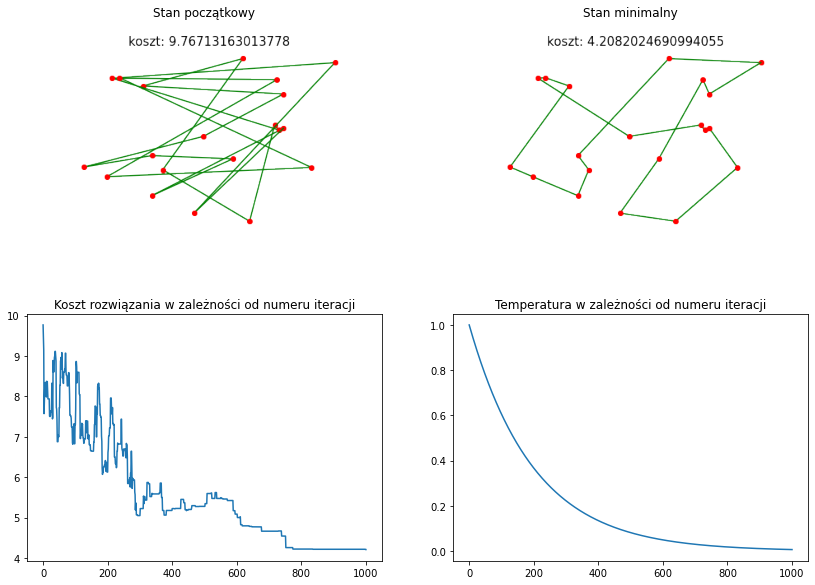

In [3]:
init_features = PointsGeneratorTSP.generate_uniform(n=20, seed=SEED)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**3, init_T=1,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_small',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

b) Rozkład jednostajny, średnia liczba wierzchołków

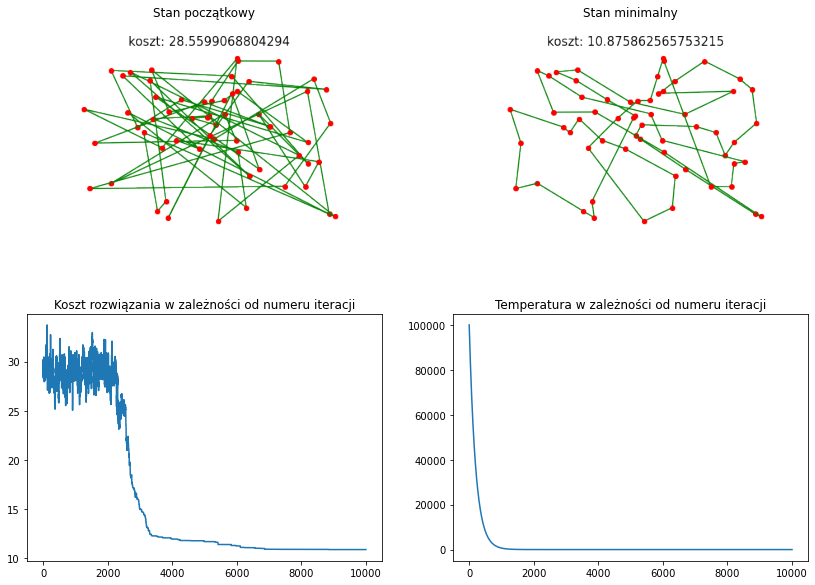

In [4]:
init_features = PointsGeneratorTSP.generate_uniform(n=60, seed=SEED)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_medium',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

c) Rozkład jednostajny, duża liczba wierzchołków

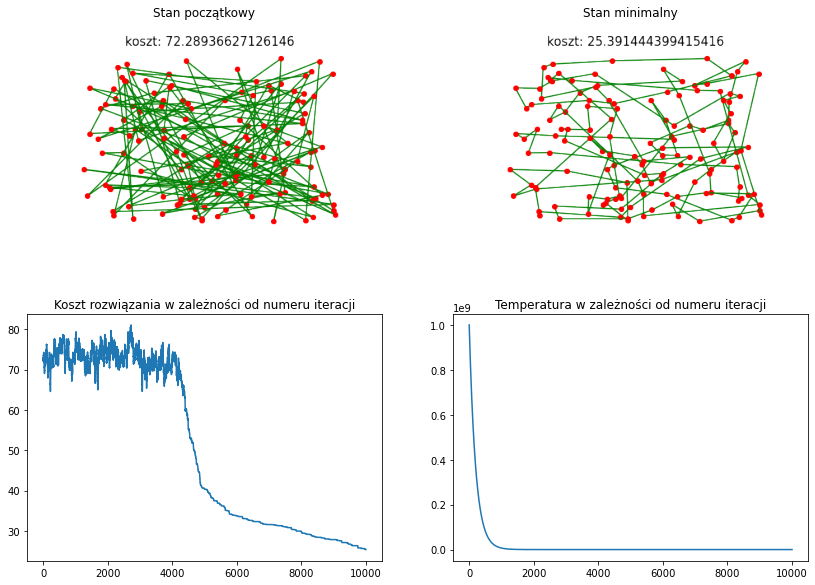

In [5]:
init_features = PointsGeneratorTSP.generate_uniform(n=140)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**9,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_big',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

d) Rozkład normalny $ \mu = 0, \sigma = 1 $, domyślne parametry

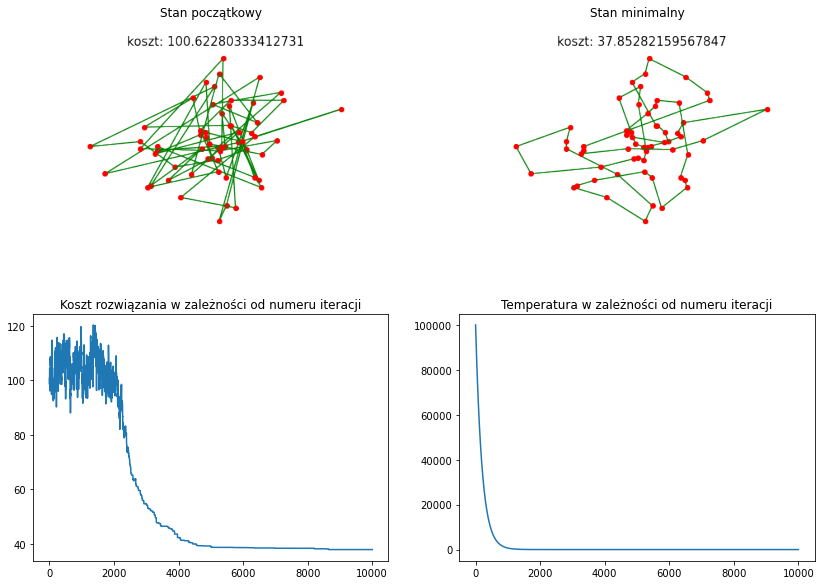

In [6]:
init_features = PointsGeneratorTSP.generate_normal(n=60, mu=0, sigma=1, seed=SEED)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma1',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

e) Rozkład normalny $ \mu = 0, \sigma = 0.1 $, leptokurtyczny

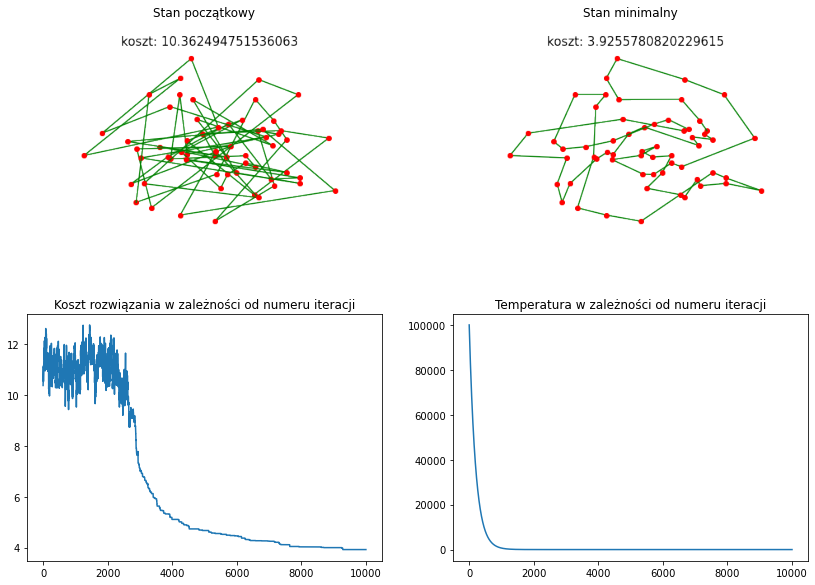

In [7]:
init_features = PointsGeneratorTSP.generate_normal(n=60, mu=0, sigma=0.1, seed=SEED)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma01',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

f) Rozkład normalny $ \mu = 0, \sigma = 3 $, platykurtyczny

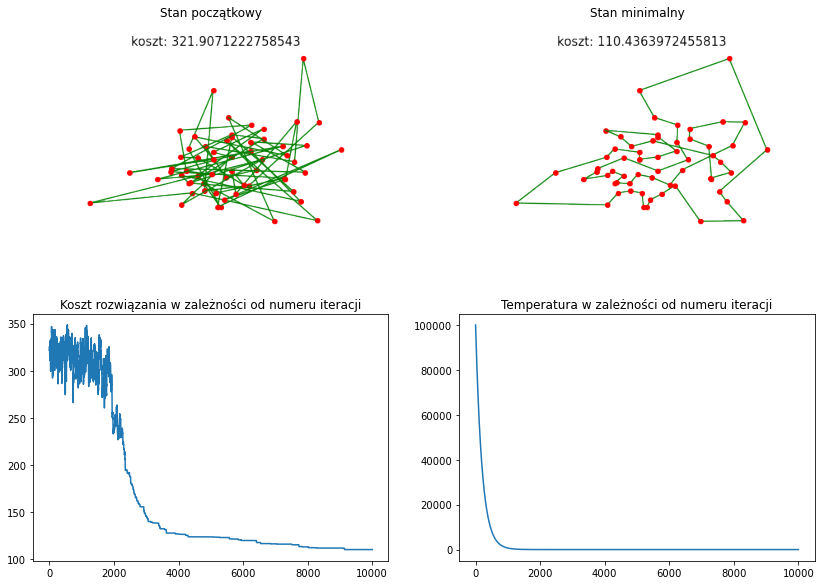

In [9]:
init_features = PointsGeneratorTSP.generate_normal(n=60, mu=0, sigma=3)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma3',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

g) Rozkład normalny $ \mu = 10, \sigma = 0 $, przesunięty

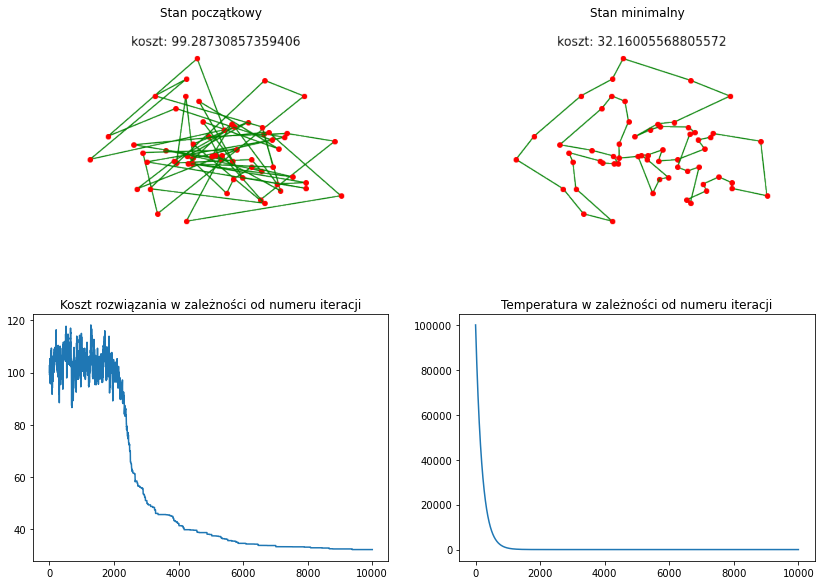

In [10]:
init_features = PointsGeneratorTSP.generate_normal(n=60, mu=10, sigma=1, seed=SEED)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu-10_sigma1',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

h) Rozkład jednostajny, 9 odseparowanych grup punktów

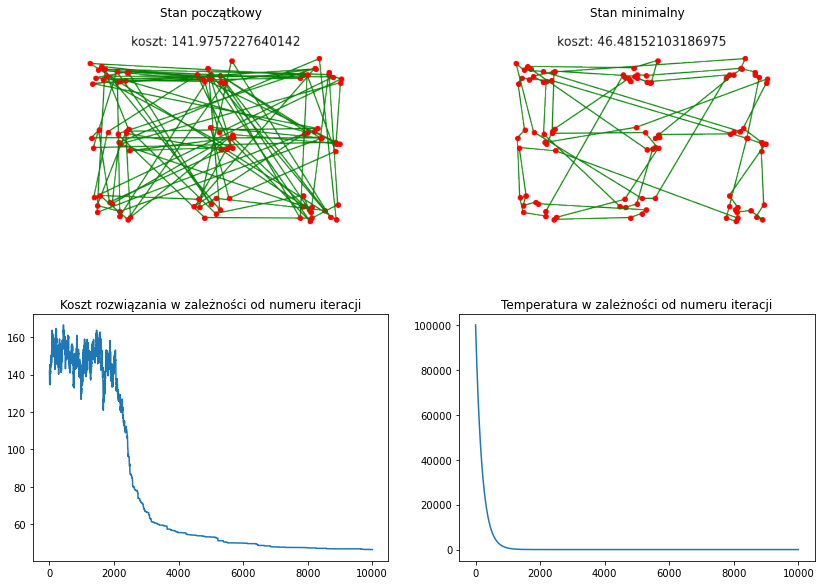

In [11]:
init_features = PointsGeneratorTSP.generate_groups(n=100, x_n_groups=3, y_n_groups=3, density=0.2, seed=SEED)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_groups9',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

### 2. Porównanie consecutive, arbitrary swap oraz zmienionej funkcji temperatury


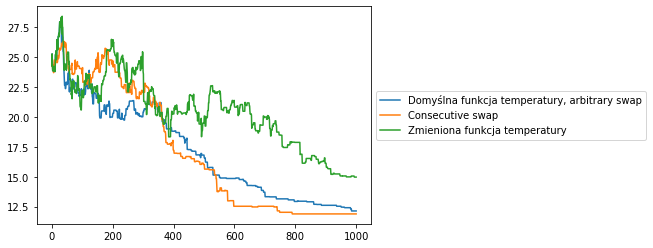

In [17]:
from SimulatedAnnealingTSP import PointsGeneratorTSP, SimulatedAnnealingTSP

SEED = 5000

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.995

init_features = PointsGeneratorTSP.generate_uniform(n=50, seed=SEED)
n_iterations = 10**3
init_T = 1

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_default',
                            seed=SEED, consecutive_swap=False)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Domyślna funkcja temperatury, arbitrary swap')

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_consecutive',
                            seed=SEED, consecutive_swap=True)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Consecutive swap')

def custom_get_next_T_func(init_T, T, i, n_iterations):
    return init_T * (1 - i/n_iterations)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=custom_get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_custom_temperature_func',
                            seed=SEED, consecutive_swap=False)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Zmieniona funkcja temperatury')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Dla dobranych parametrów widać, że zmieniona funkcja temperatury nie jest trafiona, zbiega wolniej niż pozostałe warianty.
Conscutive swap osiąga lepsze lub gorsze wyniki (w zależności od seedu) niż arbitrary swap.
Według [Wikipedii](https://en.wikipedia.org/wiki/Simulated_annealing#Selecting_the_parameters) (podsekcja Efficient candidate generation) consecutive swap powinien dawać lepsze wyniki.

## Zadanie 2 Obraz binarny

Wygeneruj losowy obraz binarny o rozmiarze n × n i wybranej gęstości δ czarnych punk-
tów δ = 0.1, 0.3, 0.4. Korzystając z różnego typu sąsiedztwa (4-sąsiadów, 8-sąsiadów,
8-16-sąsiadów) zaproponuj funkcję energii (np. w bliskiej odległości te same kolory przy-
ciągają się, a w dalszej odpychają się) i dokonaj jej minimalizacji za pomocą algorytmu
symulowanego wyżarzania. W jaki sposób można generować stany sąsiednie? Jak róż-
nią się uzyskane wyniki w zależności od rodzaju sąsiedztwa, wybranej funkcji energii i
szybkości spadku temperatury?

### W jaki sposób można generować stany sąsiednie?
Stan sąsiedni można generować przez zamianę dwóch losowych pikseli a następnie ponowne przeliczenie kosztu tylko dla tych pikseli, których ta zamiana dotyczyła oraz ich sąsiadów.

In [6]:
from SimulatedAnnealingBinaryImage import SimulatedAnnealingBinaryImage
from BinaryImage import BinaryImage

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.999

### 1. Wpływ sąsiedztwa na działanie algorytmu
Parametry testów:
- funkcja temperatury: get_next_T_func (powyższy blok)
- funkcja kosztu: $ n^2 $, gdzie n = liczba sąsiadów koloru czarnego
- sąsiedztwo: -
- gęstość: $ δ = 0.1, 0.4 $
- ilość iteracji: $ 10^5 $
- temperatura początkowa: $ 10^{10} $
- rozmiar obrazu binarnego: $ 128\times128 $ (Program liczy większe obrazy w rozsądnym czasie ale do testowania taki rozmiar w zupełności wystarcza)

#### 1.1 Sąsiedztwo 4

In [19]:
def get_cost_func_neighborhood_4(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return neighbors_cnt ** 2

neighborhood_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]

a) δ = 0.1

Czas wykonania: 15.883081912994385[s]


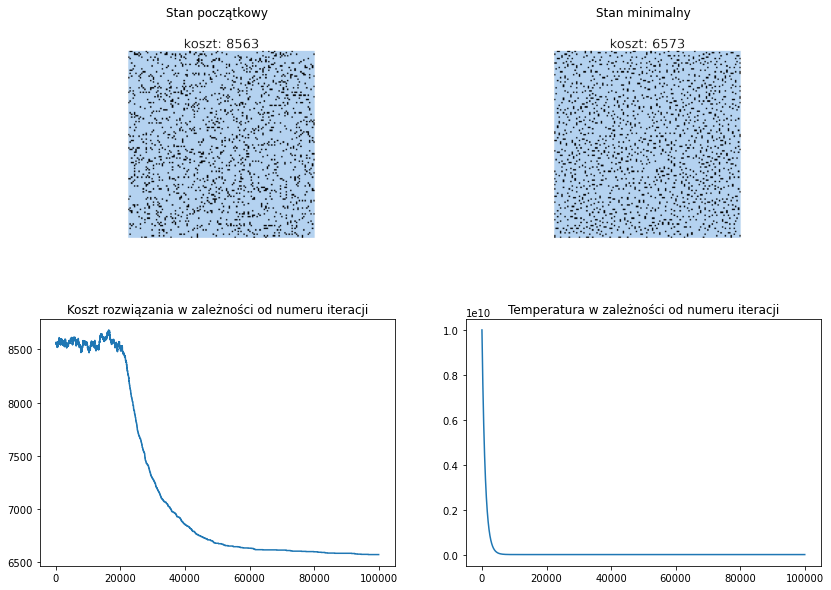

In [20]:
init_features = BinaryImage.generate(128, 128, density=0.1)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_4,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_4_d01_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

b) δ = 0.4

Czas wykonania: 17.26464080810547[s]


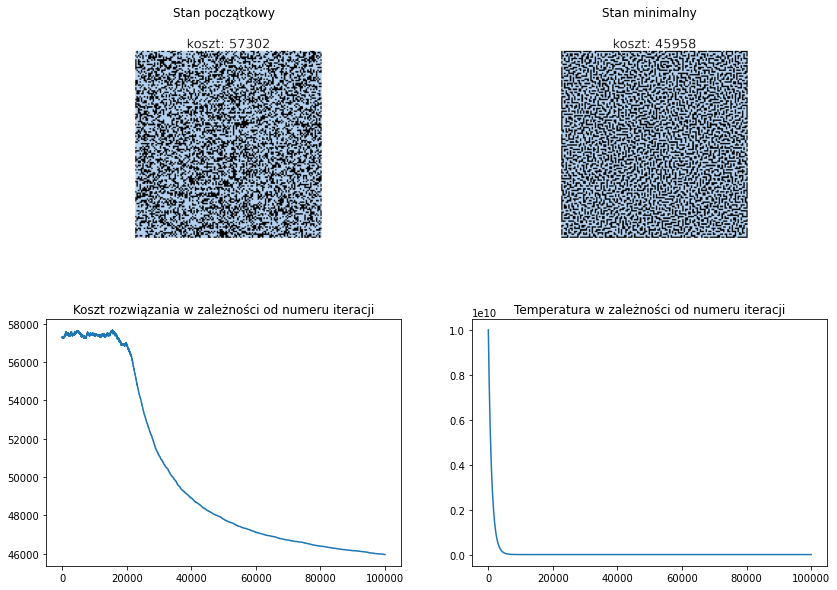

In [11]:
init_features = BinaryImage.generate(128, 128, density=0.4)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_4,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_4_d04_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

#### 1.2 Sąsiedztwo 8

In [30]:
def get_cost_func_neighborhood_8(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return neighbors_cnt ** 2

neighborhood_8 = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]

a) δ = 0.1

Czas wykonania: 50.90566062927246[s]


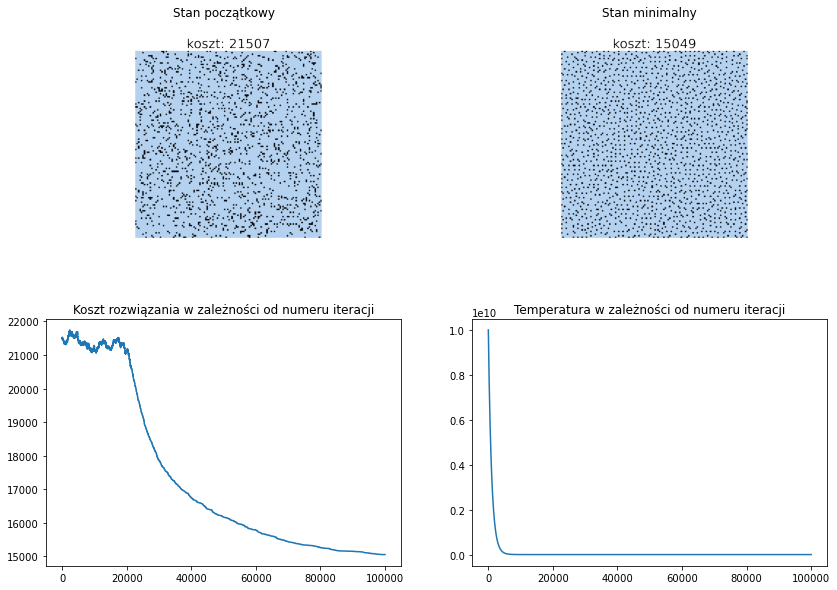

In [76]:
init_features = BinaryImage.generate(128, 128, density=0.1)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_8,
                                        neighborhood=neighborhood_8,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_8_d01_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

b) δ = 0.4

Czas wykonania: 50.2090847492218[s]


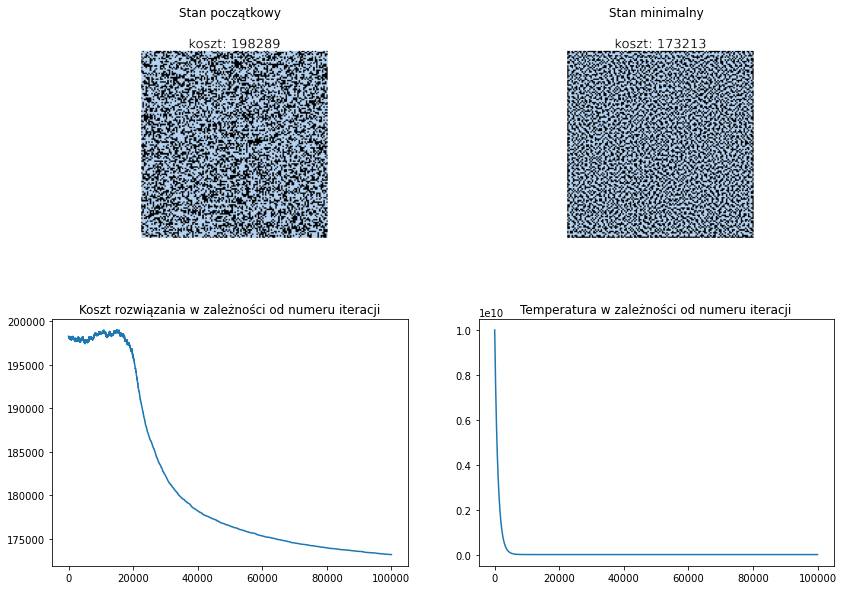

In [77]:
init_features = BinaryImage.generate(128, 128, density=0.4)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_8,
                                        neighborhood=neighborhood_8,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_8_d04_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

#### 1.3 Sąsiedztwo 16

In [21]:
def get_cost_func_neighborhood_16(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return neighbors_cnt ** 2

neighborhood_16 = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1),
                   (0, 2), (2, 0), (-2, 0), (0, -2), (1, 2), (2, 1), (-2, 1), (-1, -2)]

a) δ = 0.1

Czas wykonania: 179.4445924758911[s]


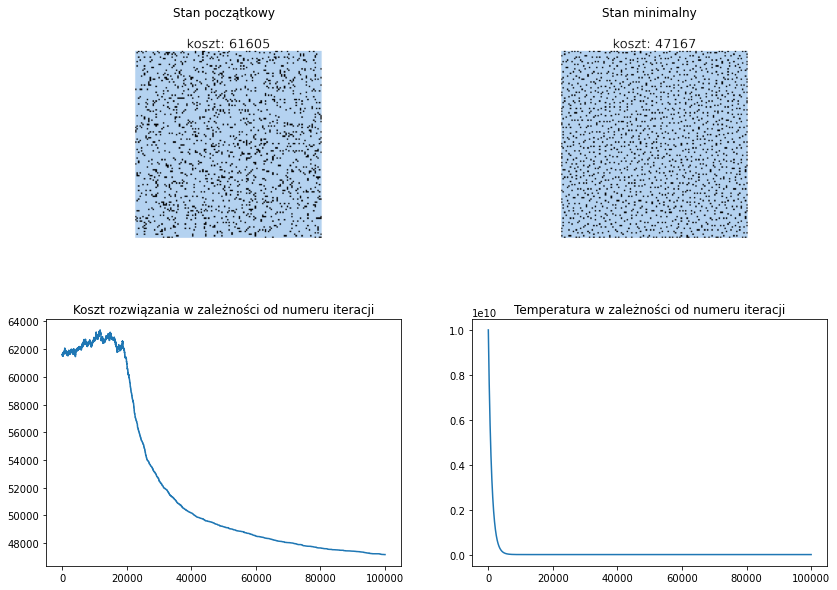

In [78]:
init_features = BinaryImage.generate(128, 128, density=0.1)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_16,
                                        neighborhood=neighborhood_16,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_16_d01_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

b) δ = 0.4

Czas wykonania: 177.39245462417603[s]


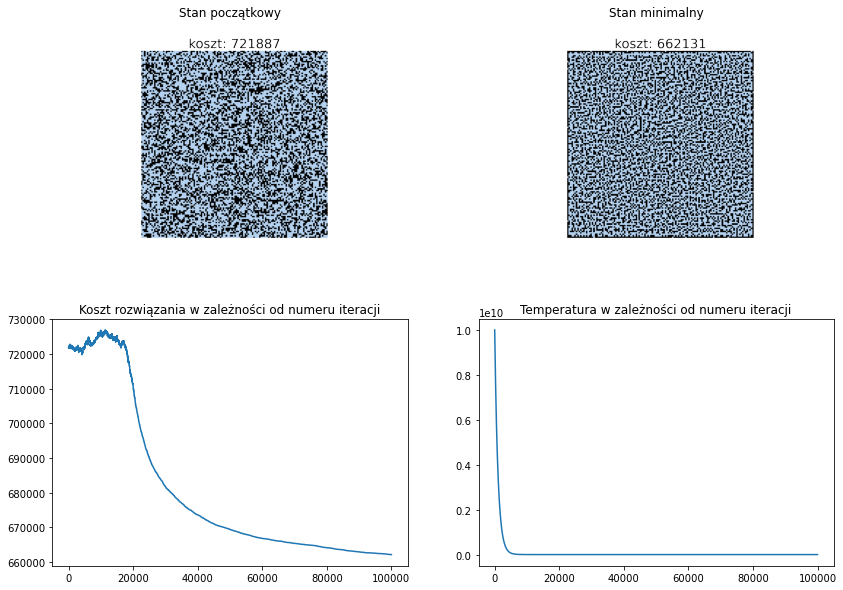

In [79]:
init_features = BinaryImage.generate(128, 128, density=0.4)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_16,
                                        neighborhood=neighborhood_16,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_16_d04_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

#### Jak różnią się uzyskane wyniki w zależności od rodzaju sąsiedztwa?
Testowane przeze mnie sąsiedztwa nie mają większego wpływu na wygląd wykresu funkcji kosztu w zależności od numeru iteracji.
Mają one wpływ na wygląd rozwiązania.

### 2. Wpływ funkcji kosztu (energii) na działanie algorytmu
Parametry testów:
- funkcja temperatury: get_next_T_func
- funkcja kosztu: -
- sąsiedztwo: neighborhood_4
- gęstość: $ δ = 0.6 $
- ilość iteracji: $ 10^5 $
- temperatura początkowa: $ 10^{10} $
- rozmiar obrazu binarnego: $ 128\times128 $ (Program liczy większe obrazy w rozsądnym czasie ale do testowania taki rozmiar w zupełności wystarcza)

a) Faworyzacja skupisk

Czas wykonania: 20.055102348327637[s]


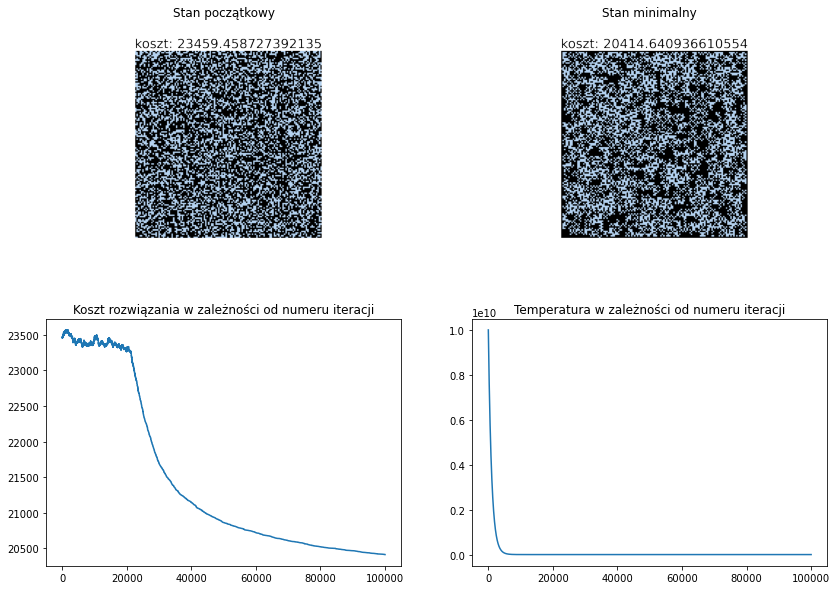

In [21]:
def get_cost_func_favor_groups(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    if neighbors_cnt == 0: return len(neighborhood)
    return neighbors_cnt ** (1/neighbors_cnt)

neighborhood_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]

init_features = BinaryImage.generate(128, 128, density=0.6)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_favor_groups,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_favor_groups_d06_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

b) Faworyzacja samotnych pikseli

Czas wykonania: 15.586836576461792[s]


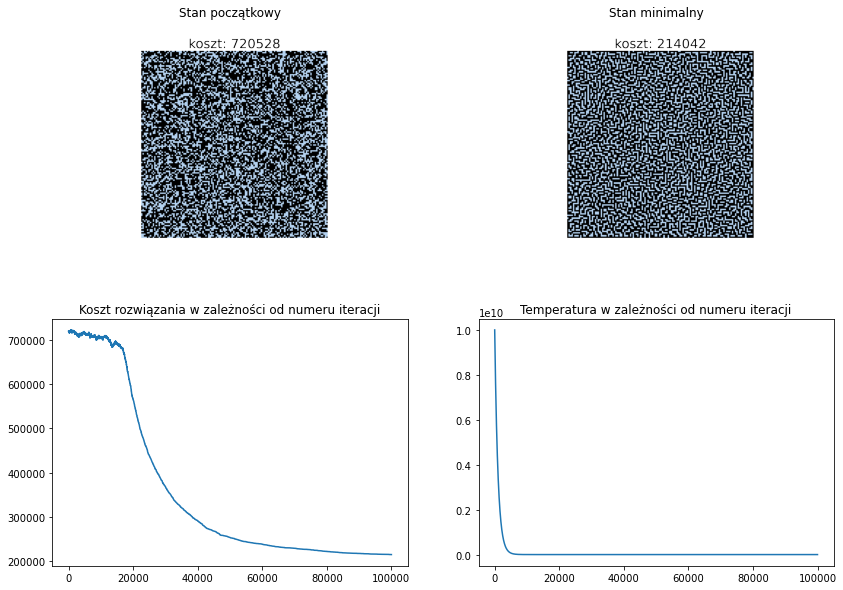

In [25]:
def get_cost_func_favor_loners(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return neighbors_cnt ** neighbors_cnt

neighborhood_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]

init_features = BinaryImage.generate(128, 128, density=0.6)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_favor_loners,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_favor_loners_d06_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

c) Faworyzacja par

Czas wykonania: 15.732799530029297[s]


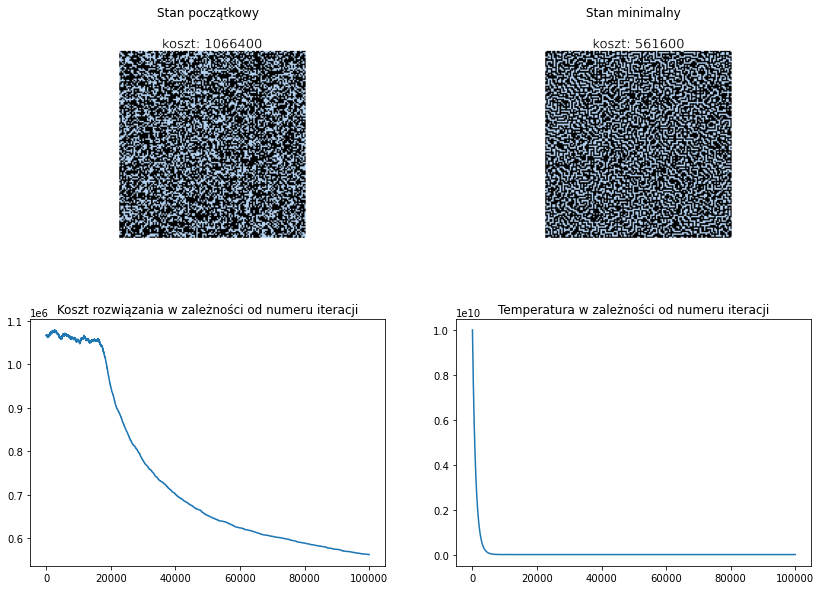

In [28]:
def get_cost_func_favor_pairs(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return 0 if neighbors_cnt == 2 else 10**2

neighborhood_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]

init_features = BinaryImage.generate(128, 128, density=0.6)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_favor_pairs,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_favor_pairs_d06_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

#### Jak różnią się uzyskane wyniki w zależności od wybranej funkcji energii?
Poprzez manipulowanie funkcją energii można określać jakie układy pikseli powinny być faworyzowane.

### 3. Wpływ funkcji temperatury na działanie algorytmu
#### Jak różnią się uzyskane wyniki w zależności od szybkości spadku temperatury?
Ciężko wykonać stosowne zestawienie ponieważ, żeby zachodziło wyrzażanie oczekiwany jest odpowiedni kształt
wykresu kosztu od numeru iteracji, który osiąga się poprzez manipulację liczbą iteracji, temperaturą początkową oraz funkcją temperatury.
Dostosowując parametry tak, aby zachodziło wyrzażanie nie będziemy porównywali samej zależności od funkcji
temperatury ale również wcześniej wymienionych parametrów.

## Zadanie 3 Sudoku

Napisz program poszukujący rozwiązania łamigłówki Sudoku za pomocą symulowanego
wyżarzania. Plansza 9 × 9 ma zostać wczytana z pliku tekstowego, w którym pola puste
zaznaczone są znakiem x. Jako funkcję kosztu przyjmij sumę powtórzeń cyfr występu-
jących w wierszach bloku 9 × 9, kolumnach bloku 9 × 9 oraz blokach 3 × 3. Zaproponuj
metodę generacji stanu sąsiedniego. Przedstaw zależność liczby iteracji algorytmu od
liczby pustych miejsc na planszy. Czy Twój program jest w stanie znaleźć poprawne
rozwiązanie dla każdej z testowanych konfiguracji wejściowych?

In [1]:
from SimulatedAnnealingSudoku import SimulatedAnnealingSudoku

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.995

a) łatwe sudoku

>>> Plik wejściowy
xxx 26x 7x1
68x x7x x9x
19x xx4 5xx

82x 1xx x4x
xx4 6x2 9xx
x5x xx3 x28

xx9 3xx x74
x4x x5x x36
7x3 x18 xxx

>>> Stan minimalny
435 269 781
682 571 493
197 834 562
           
826 195 347
374 682 915
951 743 628
           
519 326 874
248 957 136
763 418 259
Koszt: 0
~=] ROZWIĄZANIE POPRAWNE [=~


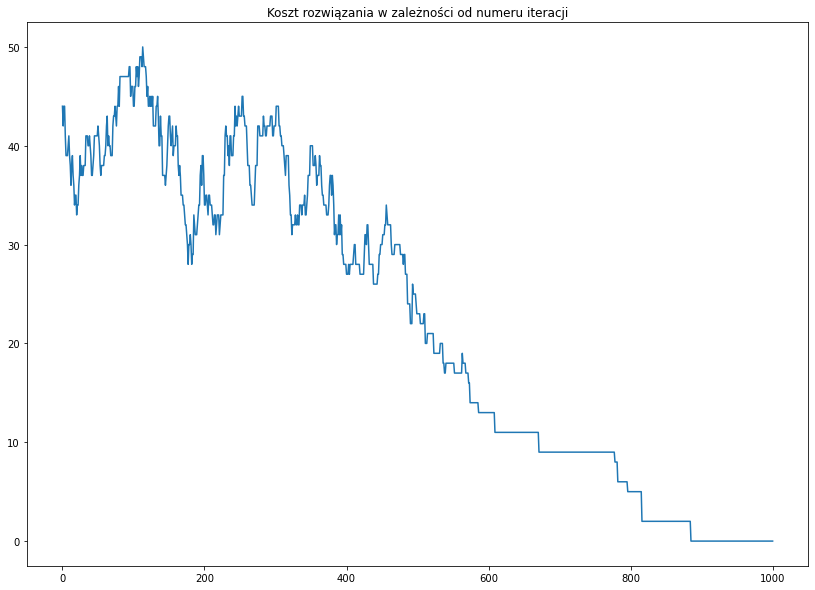

In [2]:
sudoku = SimulatedAnnealingSudoku(n_iterations=10**3, init_T=10**1,
                                  get_next_T_func=get_next_T_func,
                                  sudoku_file_path='sudokus/easy.txt')
sudoku.print_input_file()
sudoku.solve(sudoku_ans_file_path='sudokus/easy_ans.txt')
sudoku.show_cost_graph()

b) średnio zaawansowane sudoku

>>> Stan minimalny
124 678 953
586 139 742
937 245 681
           
372 481 569
651 793 824
498 562 713
           
863 924 175
219 857 436
745 316 298
Koszt: 2
~=] ROZWIĄZANIE NIEPOPRAWNE [=~


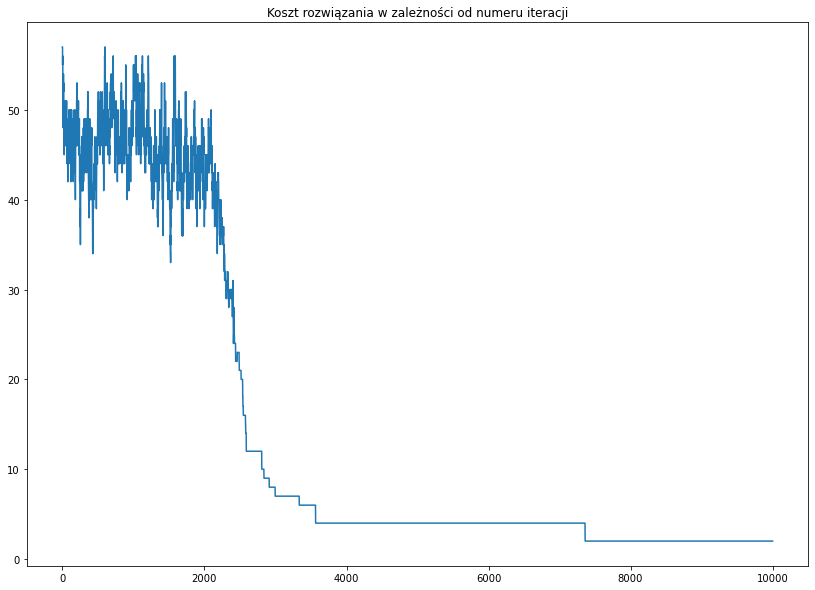

In [4]:
sudoku = SimulatedAnnealingSudoku(n_iterations=10**4, init_T=10**5,
                                  get_next_T_func=get_next_T_func,
                                  sudoku_file_path='sudokus/intermediate.txt')
sudoku.solve(sudoku_ans_file_path='sudokus/intermediate_ans.txt')
sudoku.show_cost_graph()

c) trudne sudoku

>>> Stan minimalny
132 576 489
589 234 176
476 198 325
           
621 985 734
847 623 591
395 417 268
           
954 726 813
213 849 657
768 351 942
Koszt: 2


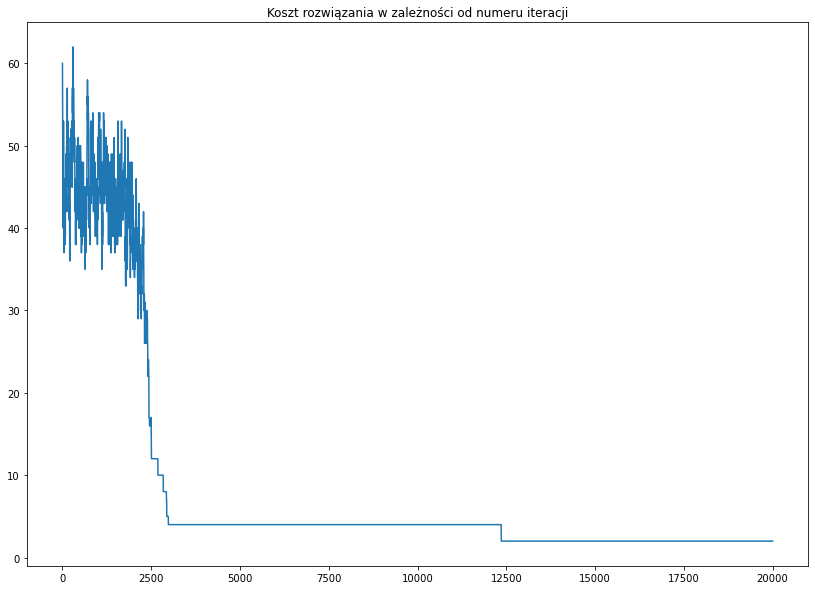

In [15]:
sudoku = SimulatedAnnealingSudoku(n_iterations=2*10**4, init_T=10**5,
                                  get_next_T_func=get_next_T_func,
                                  sudoku_file_path='sudokus/ai_lucky_diamond.txt')
sudoku.solve()
sudoku.show_cost_graph()

### Czy Twój program jest w stanie znaleźć poprawne rozwiązanie dla każdej z testowanych konfiguracji wejściowych?
Mój program nie jest w stanie znaleźć poprawnego rozwiązania dla każdej z testowanych konfiguracji wejściowych.
Daje całkiem dobre wyniki (2 powtarzające się cyfry dla średnio zaawansowanego sudoku oraz 2 dla trudnego).
Trudne sudoku, które wybrałem jest 3. najtrudniejszym sudoku według rankingu znalezionym na tej [stronie](http://www.aisudoku.com/en/AIwME.html) co utwierdza mnie w przekonaniu, że program radzi sobie przyzwoicie.
Mała ilość powtarzających się cyfr nie oznacza jednak, że rozwiązanie jest bliskie poprawnego.